In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
agrupados = pd.read_csv(r'D:\Blue EdTech\bootcamp\dados\full_grouped.csv')

In [4]:
agrupados

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


Observar os países sugeridos:
- Espanha
- Equador
- Chile
- México
- Argentina

In [6]:
paises = ['Mexico', 'Argentina', 'Ecuador', 'Chile', 'Spain']
query_paises = agrupados[agrupados['Country/Region'].isin(paises)]

In [8]:
query_paises

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
35,2020-01-22,Chile,0,0,0,0,0,0,0,Americas
51,2020-01-22,Ecuador,0,0,0,0,0,0,0,Americas
111,2020-01-22,Mexico,0,0,0,0,0,0,0,Americas
157,2020-01-22,Spain,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
34975,2020-07-27,Argentina,167416,3059,72575,91782,4890,120,2057,Americas
35004,2020-07-27,Chile,347923,9187,319954,18782,2133,75,1859,Americas
35020,2020-07-27,Ecuador,81161,5532,34896,40733,467,17,0,Americas
35080,2020-07-27,Mexico,395489,44022,303810,47657,4973,342,8588,Americas


In [9]:
query_paises.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,72781.973404,5881.014894,45723.015957,21177.942553,1359.498936,95.991489,937.884043
std,101824.646759,10203.760263,75899.586339,26475.200141,2058.306640,213.575719,2310.326259
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1918.000000,-16298.000000
25%,18.500000,0.000000,1.000000,17.750000,0.000000,0.000000,0.000000
50%,15214.500000,470.500000,3433.000000,8144.500000,374.000000,9.000000,8.500000
75%,118839.750000,5217.750000,53901.750000,30695.250000,1985.750000,69.750000,1018.500000
max,395489.000000,44022.000000,319954.000000,101617.000000,13990.000000,1179.000000,41227.000000


In [10]:
print(
    f"Médias dos 5 países\n\n",
    f"Confirmados - {query_paises.Confirmed.mean():,.0f} mil\n".replace(',','.'),
    f"Mortos      - {query_paises.Deaths.mean():,.0f} mil\n".replace(',','.'),
    f"Recuperados - {query_paises.Recovered.mean():,.0f} mil\n".replace(',','.'),
    f"Ativos      - {query_paises.Active.mean():,.0f} mil\n".replace(',','.')
    )


Médias dos 5 países

 Confirmados - 72.782 mil
 Mortos      - 5.881 mil
 Recuperados - 45.723 mil
 Ativos      - 21.178 mil



In [67]:
mexico = query_paises[query_paises['Country/Region'] == 'Mexico']
argentina = query_paises[query_paises['Country/Region'] == 'Argentina']
ecuador = query_paises[query_paises['Country/Region'] == 'Ecuador']  
chile = query_paises[query_paises['Country/Region'] == 'Chile']
spain = query_paises[query_paises['Country/Region'] == 'Spain']

<function matplotlib.pyplot.show(close=None, block=None)>

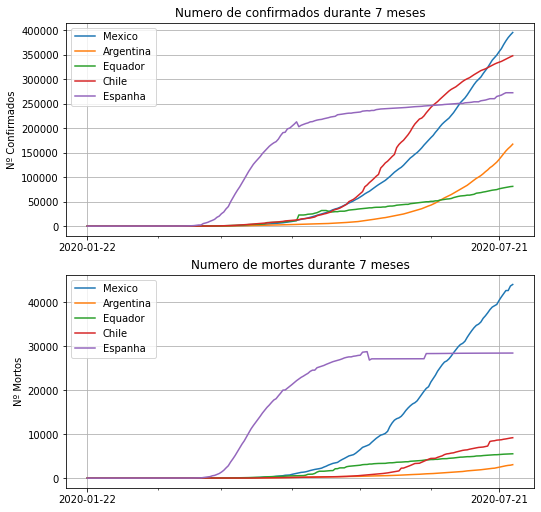

In [147]:
fig, axs = plt.subplots(2, 1, figsize=(7.4, 7), constrained_layout=True)

# Ajustando data
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)

# Grafico de linhas - Confirmados
ax = axs[0]
ax.set_title(r'Numero de confirmados durante 7 meses')
ax.set_ylabel(r'Nº Confirmados')
ax.plot('Date', 'Confirmed', data=mexico, label= 'Mexico')
ax.plot('Date', 'Confirmed', data=argentina, label= 'Argentina')
ax.plot('Date', 'Confirmed', data=ecuador, label= 'Equador')
ax.plot('Date', 'Confirmed', data=chile, label= 'Chile')
ax.plot('Date', 'Confirmed', data=spain, label= 'Espanha')
ax.legend()

# Grafico de linhas - Mortes
ax = axs[1]
ax.set_title(r'Numero de mortes durante 7 meses')
ax.set_ylabel(r'Nº Mortos')
ax.plot('Date', 'Deaths', data=mexico, label= 'Mexico')
ax.plot('Date', 'Deaths', data=argentina, label= 'Argentina')
ax.plot('Date', 'Deaths', data=ecuador, label= 'Equador')
ax.plot('Date', 'Deaths', data=chile, label= 'Chile')
ax.plot('Date', 'Deaths', data=spain, label= 'Espanha')
ax.legend()


plt.show